# Importing The Dependencies

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import warnings as wg
wg.filterwarnings("ignore")
import os

# Data Collection and Processing

In [38]:
# Loading the dataset to a Pandas DataFrame
flower_data = pd.read_csv("IRIS.csv")

In [39]:
# first five rows of the dataset
flower_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
flower_data['petal_length'].max()

6.9

In [41]:
# number of rows and columns
print("Number of rows :", flower_data.shape[0])
print("Number of columns :", flower_data.shape[1])

Number of rows : 150
Number of columns : 5


In [42]:
flower_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
flower_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
# checking the null values
flower_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [45]:
# checking the datatypes of each column
flower_data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# DATA VISUALIZATION

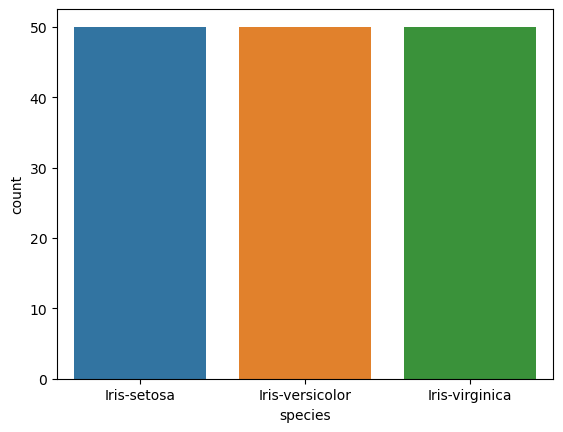

In [46]:
# counting the number of class in species column
sns.countplot(x = flower_data['species'])
plt.show()

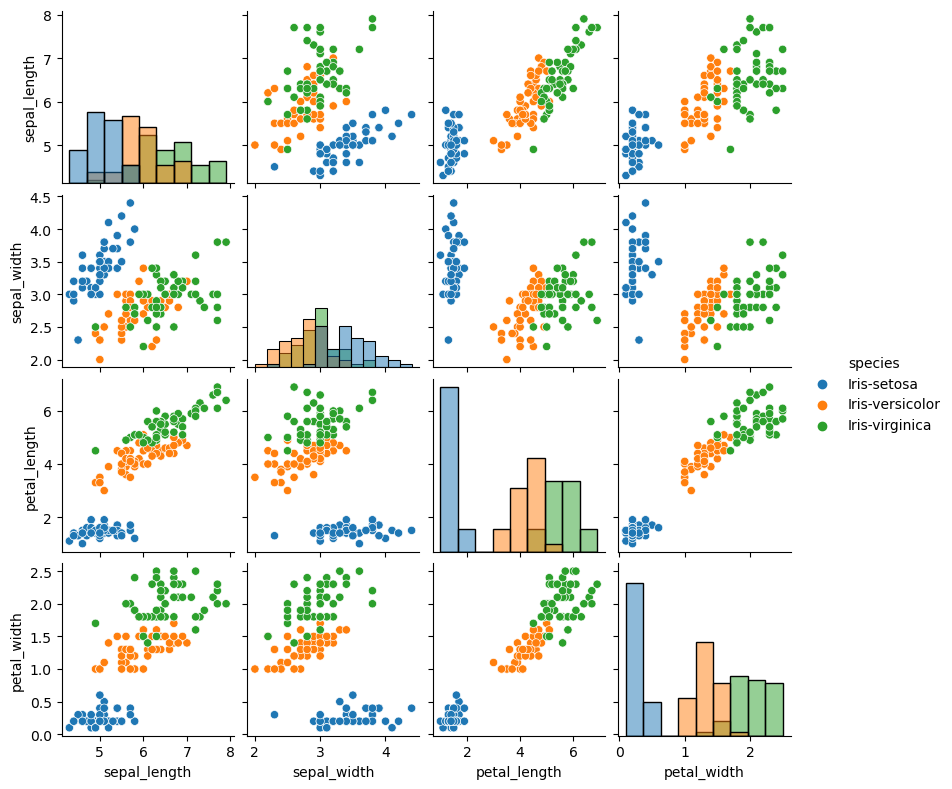

In [47]:
# pairplot
sns.pairplot(flower_data, hue = 'species', size = 2, diag_kind = "hist")
plt.show()

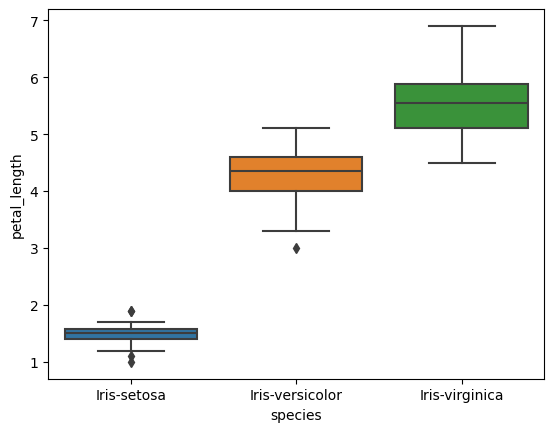

In [48]:
# boxplot
sns.boxplot(x = 'species', y = 'petal_length', data = flower_data)
plt.show()

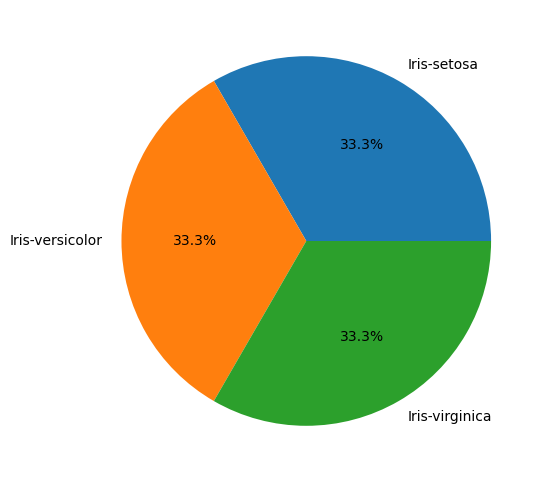

In [49]:
# piechart
py = flower_data['species'].value_counts()
plt.figure(figsize = (6,6))
plt.pie(py, labels = py.index, autopct = "%.1f%%")
plt.xticks()
plt.show()

In [50]:
# converting target variable into numerical using label encoding
dict ={'Iris-setosa' : 0, 'Iris-versicolor' :  1, 'Iris-virginica' : 2}

# print the dictionary
print(dict)

# remap the values of the dataframe
flower_data.replace({'species':dict}, inplace = True)

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


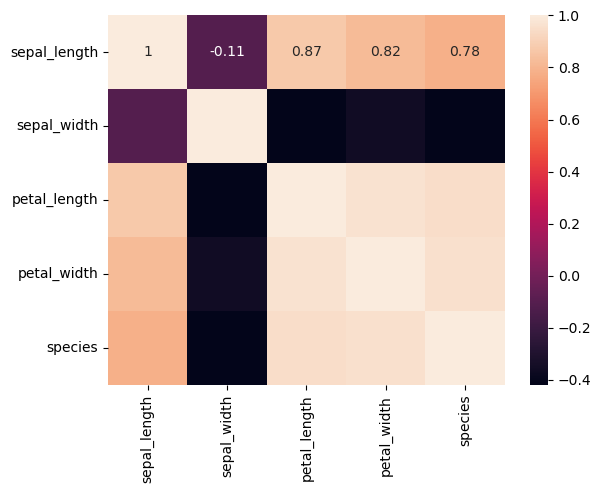

In [51]:
# heatmap with target variable
sns.heatmap(flower_data.corr(), annot = True)
plt.show()

# Splitting the data into Training and Testing

In [52]:
# feature variable and target variable
X  = flower_data.iloc[:,0:4]
Y = flower_data['species']

In [53]:
# training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.30, random_state = 42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [55]:
print(X_test)
print(Y_test)

     sepal_length  sepal_width  petal_length  petal_width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6.0          2.9           4.5          1.5
76            6.8          2.8           4.8          1.4
31            5.4          3.4           1.5          0.4
64            5.6          2.9           3.6          1.3
141           6.9          3.1           5.1          2.3
68            6.2          2.2           4.5          1.5
82            5.8          2.7           3.9          1.2
110           6.5          3.2           5.1          2.0
12            4.8          3.0           1.4          0.1
36            5.5          3.5           1.3          0.2
9             4.9          3.1           1.5          0.1
19            5.1          3.8           1.5          0.3
56            6.3          3.3           4.7          1.6
104           

# Building the model

In [56]:
# Using Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state = 1234)

In [57]:
# Fitting X_train, Y_train into model
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=1234)

In [58]:
# predictions
Y_pred = dtc.predict(X_test)

# Evaluation Metrices

In [59]:
# Classification report
result = classification_report(Y_test,Y_pred)
print(result)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [60]:
print(accuracy_score(Y_test,Y_pred))

1.0


In [61]:
# Comparision of Actual and Prediction values
comparision = pd.DataFrame({'Actual Value' : Y_test, 'Prediction Value' : Y_pred})
comparision.head(10)

,Actual Value,Prediction Value
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


# Visualization of Decision Tree Classifier

In [62]:
features = ['sepal length (cm)', 'sepal width (cm)',  'petal length (cm)', 'petal width (cm)']
classes = np.array(['setosa', 'versicolor', 'verginica'])

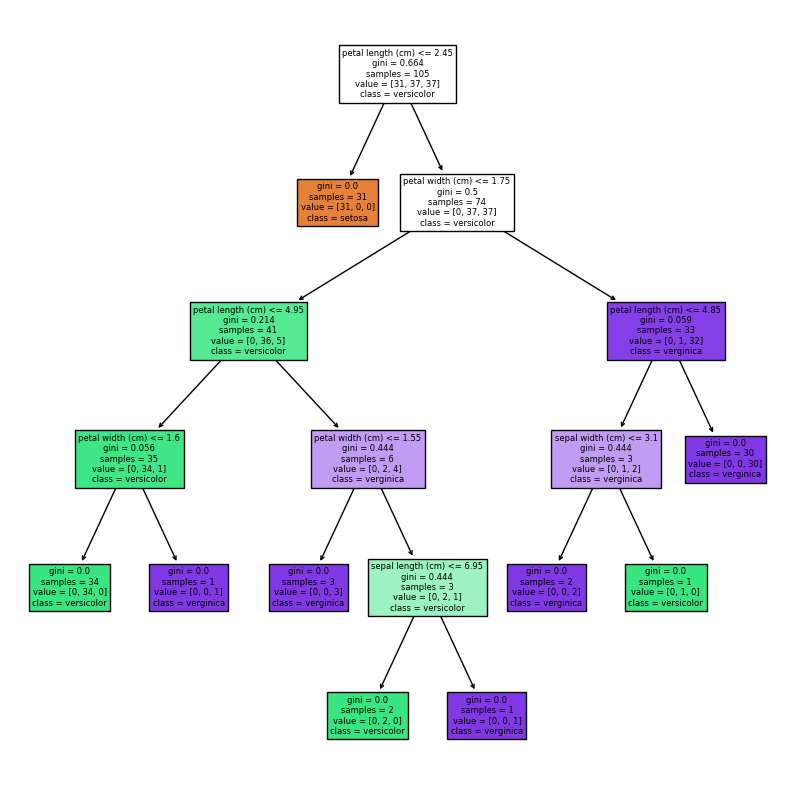

In [63]:
from sklearn import tree
fig = plt.figure(figsize = (10,10))
tree.plot_tree(dtc, feature_names = features, class_names = classes, filled = True)
plt.show()

In [88]:
# defining functions
def classify(a,b,c,d):
    data = pd.DataFrame({"sepal_length":[a], "sepal_width":[b], "petal_length":[c],"petal_width":[d]})
    prediction = dtc.predict(data)
    if prediction == [0]:
        print("Iris-setosa")
    elif prediction == [1]:
        print("Iris-versicolor")
    else:
        print("Iris-virginica")

In [89]:
classify(6.4,2.3,6.7,1.5)

Iris-virginica


In [91]:
classify(5.4,3.7,1.5,0.2)

Iris-setosa


In [92]:
classify( 6.1,2.8,4.7,1.2)

Iris-versicolor


In [94]:
classify( 5.7,3.8,1.7,0.3)

Iris-setosa


In [95]:
classify(6.0,2.9,4.5,1.5)

Iris-versicolor
